In [41]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import matplotlib.pyplot as plt
from IPython.display import Image

Kinematic Equations:

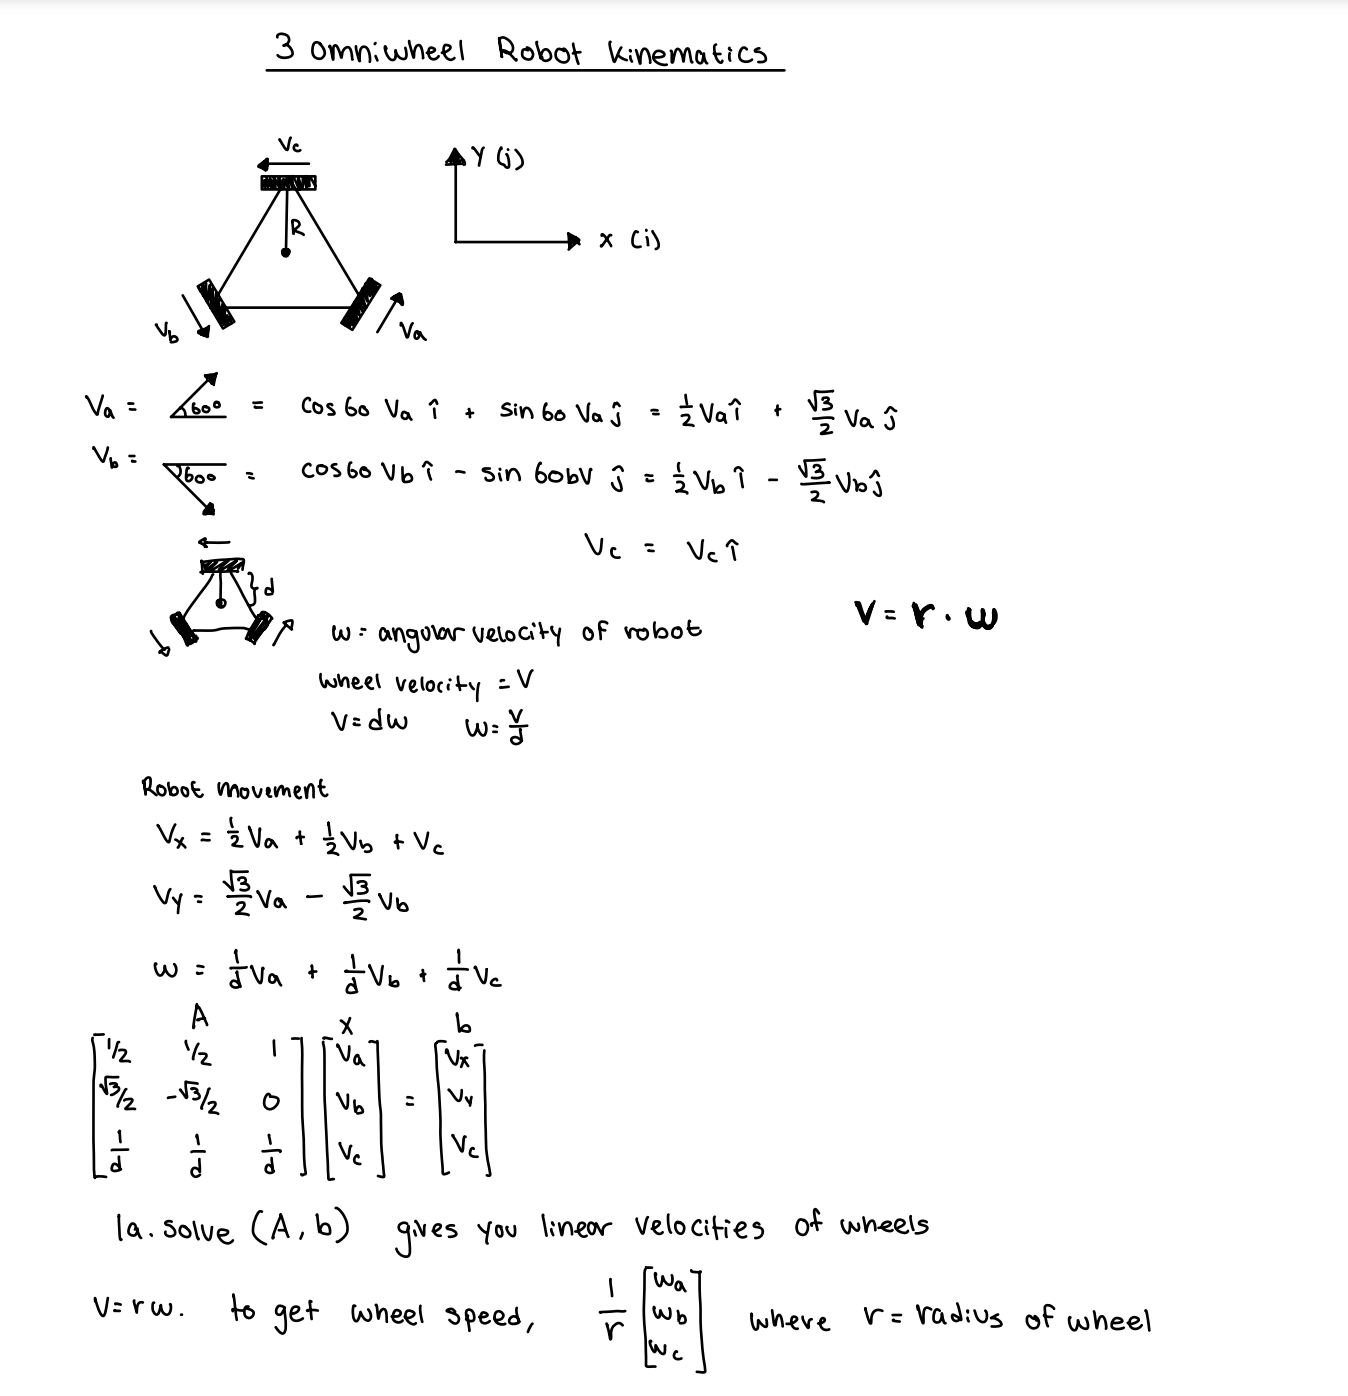

In [42]:
Image(filename = 'RobotKinematics.png')

In [4]:
''' 
Plots a single vector on a grid. Vector tail starts at (0,0) by default
'''

def display_vector(output, start = (0,0)):
    # Define the components of the vector
    x_component = output[0]
    y_component = output[1]

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot the vector
    ax.quiver(start[0], start[1], x_component, y_component, angles='xy', scale_units='xy', scale=1, color='b')

    # Set the limits of the plot
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)

    # Add labels for the axes
    plt.xlabel('X')
    plt.ylabel('Y')

    # Show the plot
    plt.grid()
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [5]:
'''
Returns an array of the x and y velocitys of the robot, based on an input array containing the wheel speeds
The wheel speeds are linear velocities, not angular velocities
'''

def wheel_velocities_to_bot_speed(speeds): 
    speed_x = 0.5 * speeds[0] + 0.5 * speeds[1] + speeds[2]
    speed_y = math.sqrt(3)/2 * speeds[0] -  math.sqrt(3)/2 * speeds[1]
    return np.array([speed_x, speed_y])


0.9150635094610964 -3.4150635094610964 2.5
[1.25 3.75]


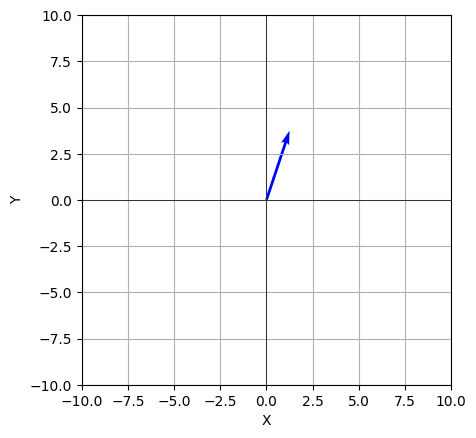

In [6]:
#%%timeit
#this one is from https://www.scirp.org/journal/paperinformation.aspx?paperid=102349

x_speed = 2.5
y_speed = 2.5
angular_velocity = 0
radius_to_wheel = 0.5
desired_speed = la.norm([x_speed, y_speed])

#(wheel1, wheel2, wheel3) correspond to Va, Vb, Vc respectively
wheel1 = -1/2 * x_speed + math.sqrt(3)/2 * y_speed + radius_to_wheel * angular_velocity
wheel2 = -1/2 * x_speed - math.sqrt(3)/2 * y_speed + radius_to_wheel * angular_velocity
wheel3 = x_speed + radius_to_wheel * angular_velocity
print(wheel1, wheel2, wheel3)

output = wheel_velocities_to_bot_speed([wheel1, wheel2, wheel3])

print (output)
display_vector(output)


[-1.05662433 -3.94337567  5.        ]


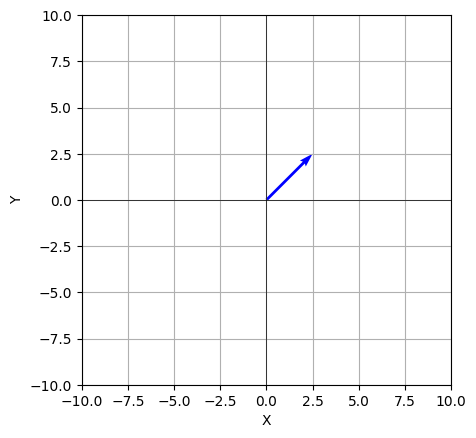

In [44]:
#%%timeit
#This one is my own calculations. They are from the image at the top of this notebook

R = 0.10 #radius of bot center to wheel in meters
x_speed = 2.5
y_speed = 2.5
angular_velocity = 0

#desired_speed = la.norm([x_speed, y_speed])
#print("speed =", desired_speed)

conversion_matrix = np.array([[0.5, 0.5, 1],
                              [math.sqrt(3)/2, -math.sqrt(3)/2, 0],
                              [1/R, 1/R, 1/R]])
b = np.array([x_speed, y_speed, angular_velocity])

#Wheel velocities are the linear velocities corresponding to Va, Vb, and Vc respectively
wheel_velocities = la.solve(conversion_matrix, b)
output = wheel_velocities_to_bot_speed(wheel_velocities)

print (wheel_velocities)
display_vector(output)


[ 0.91506351 -3.41506351  2.5       ]


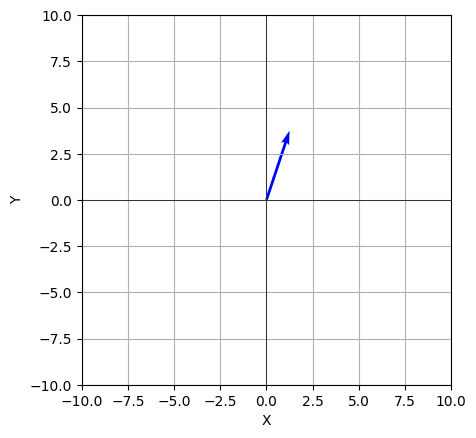

In [8]:
#%%timeit
#this one is from: https://modernrobotics.northwestern.edu/nu-gm-book-resource/13-2-omnidirectional-wheeled-mobile-robots-part-1-of-2/#department

#draft
R = 0.10 #radius of bot center to wheel in meters
x_speed = 2.5
y_speed = 2.5
angular_velocity = 0


desired_speed = la.norm([x_speed, y_speed])
#print("speed =", desired_speed)


conversion_matrix = np.array([[-R, -0.5, math.sqrt(3)/2],
                              [-R, -0.5, -math.sqrt(3)/2],
                              [-R, 1, 0]])

parameters = np.array([angular_velocity, x_speed, y_speed])

#Wheel velocities are the linear velocities corresponding to Va, Vb, and Vc respectively
x = np.dot(conversion_matrix, parameters)

output = wheel_velocities_to_bot_speed(x) #idk why needed here :(

print (x)
display_vector(output)



Robot Simulation:


In [9]:
ROBOT_RADIUS = 0.01

In [10]:
#Second method
#%%timeit
#This one is my own calculations


def get_wheel_speed(x_direction, y_direction, velocity):
    x_speed = x_direction * velocity
    y_speed = y_direction * velocity
    angular_velocity = 0

    conversion_matrix = np.array([[0.5, 0.5, 1],
                                [math.sqrt(3)/2, -math.sqrt(3)/2, 0],
                                [1/R, 1/R, 1/R]])
    b = np.array([x_speed, y_speed, angular_velocity])

    x = la.solve(conversion_matrix, b)

    return x



In [11]:
def calculate_direction(current_position, goal_position):
    x_direction = goal_position[0] - current_position[0]
    y_direction = goal_position[1] - current_position[1]
    return (x_direction, y_direction)


In [12]:
def display_simulation(vectors):
    fig, ax = plt.subplots()
    # Plot each vector in the list
    for vector in vectors:
        ax.quiver(vector[0], vector[1], vector[2], vector[3], angles='xy', scale_units='xy', scale=1, color='b')

    # Set the limits of the plot
    plt.xlim(-20, 20)
    plt.ylim(-20, 20)

    # Add labels for the axes
    plt.xlabel('X')
    plt.ylabel('Y')

    # Show the plot
    plt.grid()
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

[ 7.5 -5. ]
[ 3.75 -2.5 ]
[ 1.875 -1.25 ]
[ 0.9375 -0.625 ]
[ 0.46875 -0.3125 ]
[ 0.234375 -0.15625 ]
[ 0.1171875 -0.078125 ]
[ 0.05859375 -0.0390625 ]
[ 0.02929688 -0.01953125]
[ 0.01464844 -0.00976562]
[ 0.00732422 -0.00488281]
[ 0.00366211 -0.00244141]
[ 0.00183105 -0.0012207 ]
[ 0.00091553 -0.00061035]
[ 0.00045776 -0.00030518]
[ 0.00022888 -0.00015259]
[ 1.14440918e-04 -7.62939453e-05]
[ 5.72204590e-05 -3.81469727e-05]
[ 2.86102295e-05 -1.90734863e-05]
final_position:  [ 15. -10.]  number of updates:  19


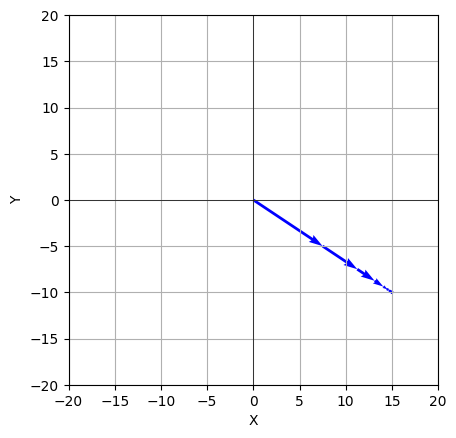

In [37]:
steps = 20
start = (0,0)
end = (15,-10)
velocity = 0.5 #if you want to go straight there
distance = la.norm(calculate_direction(start, end))
confidence = 0.0001

current_position = np.array(start)

# Initialize an empty list to store vectors
vectors = []

while (abs(distance) >= confidence):
    goal_vector = calculate_direction(current_position, end)
    distance = la.norm(goal_vector)
    wheelspeeds = get_wheel_speed(goal_vector[0], goal_vector[1], velocity)
    botmovement_vector = wheel_velocities_to_bot_speed(wheelspeeds)
    print(botmovement_vector)
    vectors.append([current_position[0], current_position[1], botmovement_vector[0], botmovement_vector[1]])
    current_position = current_position + botmovement_vector 




print("final_position: ", np.round(current_position,2), " number of updates: ", len(vectors))
display_simulation(vectors)
